In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data =pd.read_csv('https://raw.githubusercontent.com/Pradnya1208/Telecom-Customer-Churn-prediction/main/data.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
data.isnull().sum().sum()

0

In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
import seaborn as sns

<AxesSubplot:>

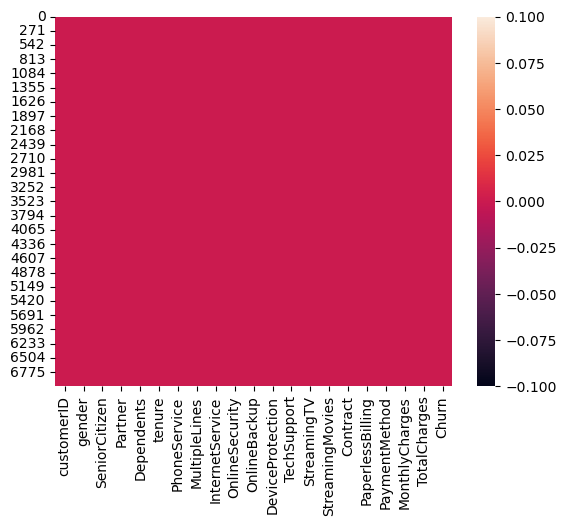

In [12]:
sns.heatmap(data.isnull())

In [13]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
data['TotalCharges'].nunique()

6531

In [15]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

In above cell we clearly observe that no value present in 11 times , nothing is present there.
This is known as wide space.
for indentation in python we ausing this wide spaces.
this may be one of the reason that data type of this is object instead of float

In [16]:
data.loc[data["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
data["TotalCharges"] = data["TotalCharges"].replace(" ", np.nan)
data["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [18]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

converting object dtype into float dtype

In [19]:
data["TotalCharges"] = data["TotalCharges"].astype(float)
data["TotalCharges"].dtype

dtype('float64')

In [20]:
np.mean(data['TotalCharges'])

2283.3004408418697

In [21]:
data.iloc[3331,:]

customerID                   7644-OMVMY
gender                             Male
SeniorCitizen                         0
Partner                             Yes
Dependents                          Yes
tenure                                0
PhoneService                        Yes
MultipleLines                        No
InternetService                      No
OnlineSecurity      No internet service
OnlineBackup        No internet service
DeviceProtection    No internet service
TechSupport         No internet service
StreamingTV         No internet service
StreamingMovies     No internet service
Contract                       Two year
PaperlessBilling                     No
PaymentMethod              Mailed check
MonthlyCharges                    19.85
TotalCharges                        NaN
Churn                                No
Name: 3331, dtype: object

In [22]:
data["TotalCharges"] = data["TotalCharges"].fillna(data['TotalCharges'].mean())

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
 data[data["tenure"] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,2283.300441,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,2283.300441,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,2283.300441,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,2283.300441,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,2283.300441,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,2283.300441,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,2283.300441,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,2283.300441,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,2283.300441,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,2283.300441,No


In [26]:
data.nunique().to_frame("no.of unique values")

,no.of unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [27]:
data.drop('customerID',axis =1, inplace = True)

In [28]:
data.tail(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No
7036,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [29]:
cate_col = []
for i in data.dtypes.index:
    if data.dtypes[i] == 'object':
        cate_col.append(i)
cate_col 

num_col = []
for i in data.dtypes.index :
    if data.dtypes[i] != 'object' :
        num_col.append(i)
        
num_col        

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [30]:
cate_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [31]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
data.Churn[data.Churn == "No"].groupby(by = data.gender).count()

gender
Female    2549
Male      2625
Name: Churn, dtype: int64

In [33]:
data.Churn[data.Churn =='Yes'].groupby(by = data.gender).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [34]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

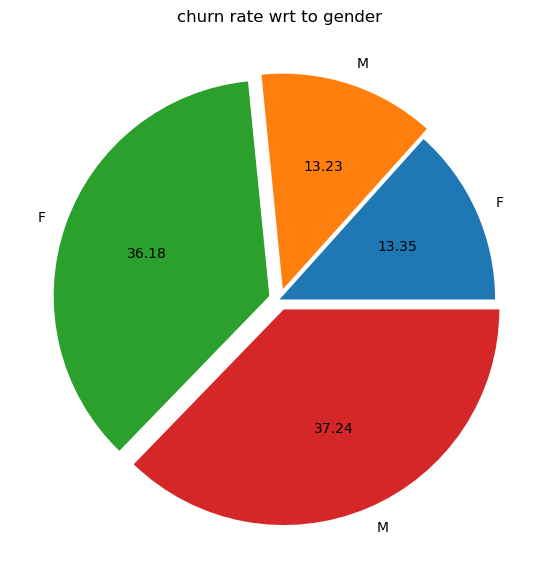

In [35]:
plt.figure(figsize=(7,7))
plt.pie(x=[939,930, 2544,2619], labels = ["F","M","F","M"], explode = (0,0.05,.05,.05), autopct = "%0.2f")
plt.title("churn rate wrt to gender")
plt.show()

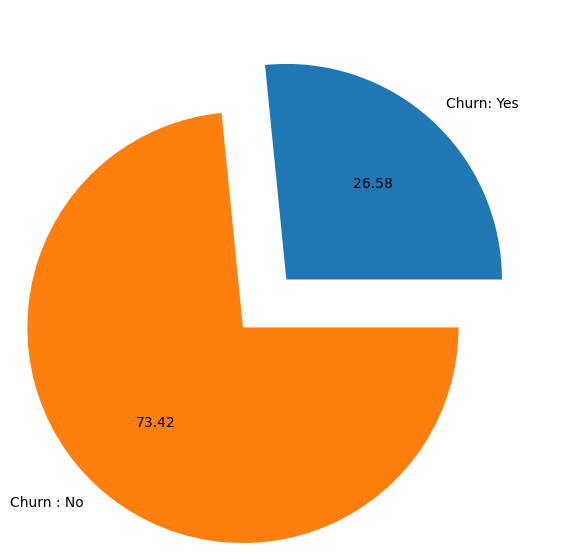

In [36]:
plt.figure(figsize=(7,7))
plt.pie(x = [1869,5163], labels = ['Churn: Yes', 'Churn : No'], explode = (0,0.3), autopct = "%.2f")
plt.show()

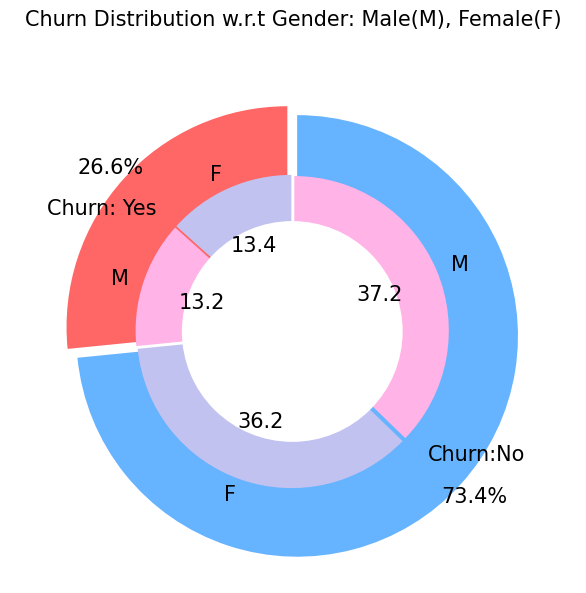

In [37]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
colors = ['#ff6666', '#66b3ff']
explode = (0.3,0.3)

labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode_gender = (0.1,0.1,0.1,0.1)

textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,
        frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,autopct = '%0.001f',colors=colors_gender,startangle=90, explode=explode_gender,
        radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='green', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

# Bi-variate analysis
we are doing the analysis betwwen the two plots

No     5174
Yes    1869
Name: Churn, dtype: int64


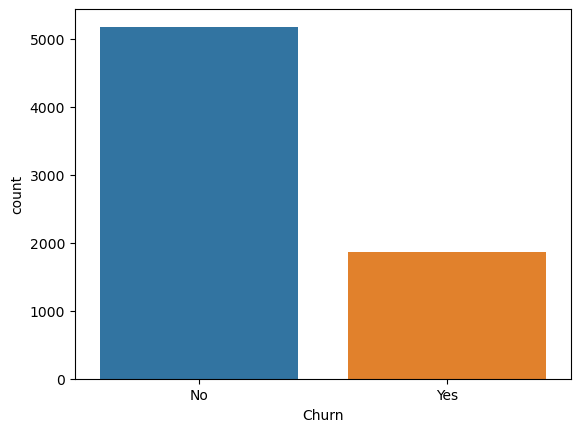

In [38]:
ax = sns.countplot(x='Churn', data= data)
print(data['Churn'].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64


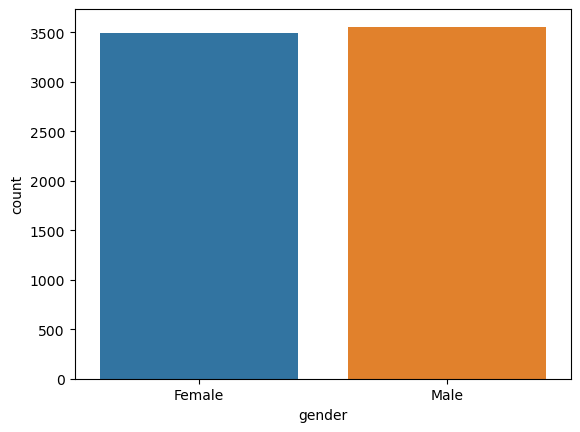

In [39]:
ax = sns.countplot(x='gender', data= data)
print(data['gender'].value_counts())

the female and male count number is almost same

No     3641
Yes    3402
Name: Partner, dtype: int64


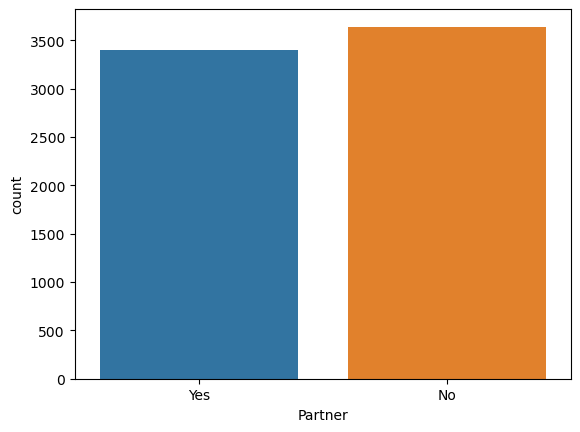

In [40]:
ax = sns.countplot(x='Partner', data= data)
print(data['Partner'].value_counts())

In [41]:
# we can easily obseverd that patrner count is amlost same.

No     4933
Yes    2110
Name: Dependents, dtype: int64


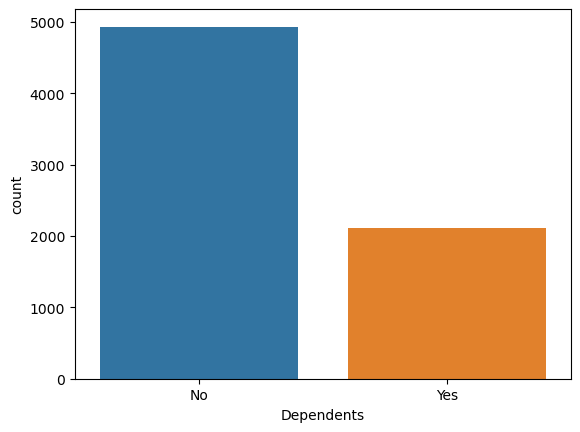

In [42]:
ax = sns.countplot(x='Dependents', data= data)
print(data['Dependents'].value_counts())

In [43]:
# there is a large diffrence between the dependnt column no churn rate is dependent  is very high as compared to yes

Yes    6361
No      682
Name: PhoneService, dtype: int64


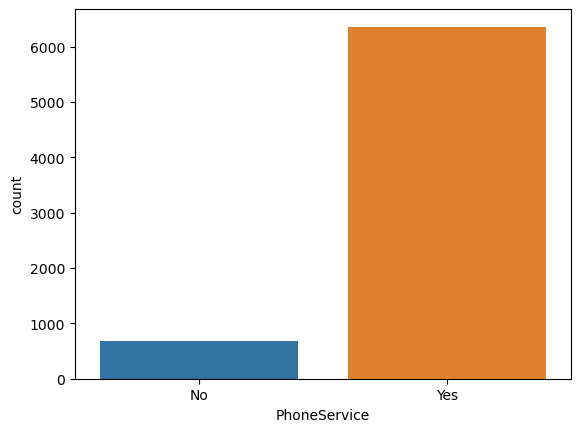

In [44]:
ax = sns.countplot(x='PhoneService', data= data)
print(data['PhoneService'].value_counts())

In [45]:
#most of the people using the phone sevice but ratio is much high as compared to the pepole who dont have the phone service

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


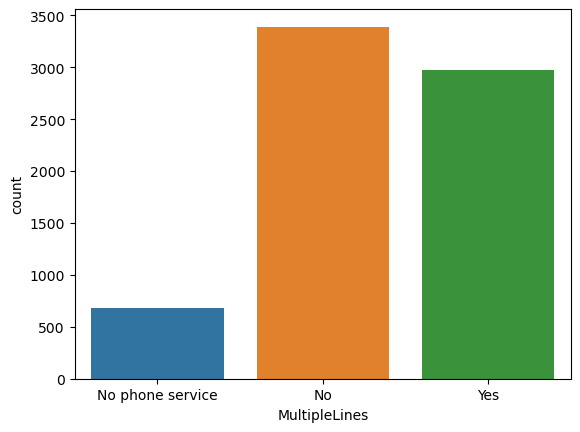

In [46]:
ax = sns.countplot(x='MultipleLines', data= data)
print(data['MultipleLines'].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


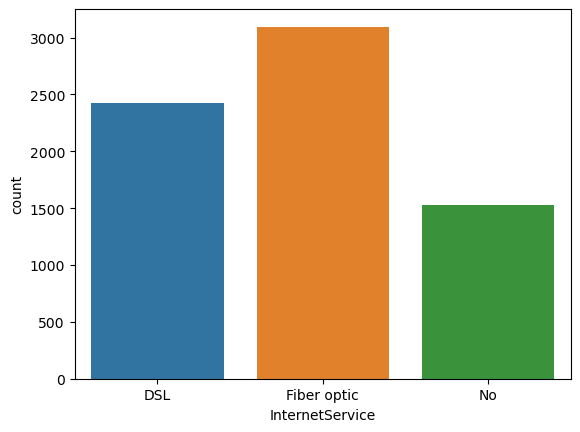

In [47]:
ax = sns.countplot(x='InternetService', data= data)
print(data['InternetService'].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


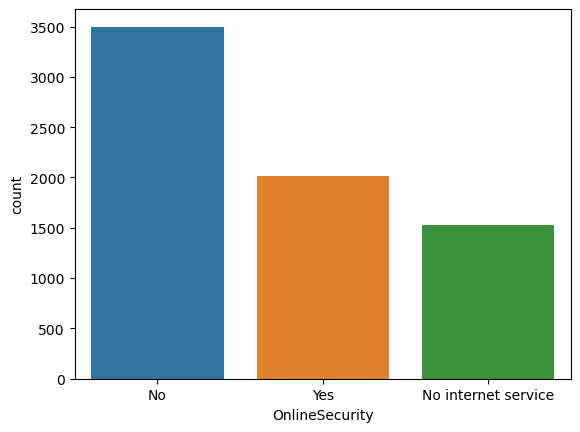

In [48]:
ax = sns.countplot(x='OnlineSecurity', data= data)
print(data['OnlineSecurity'].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


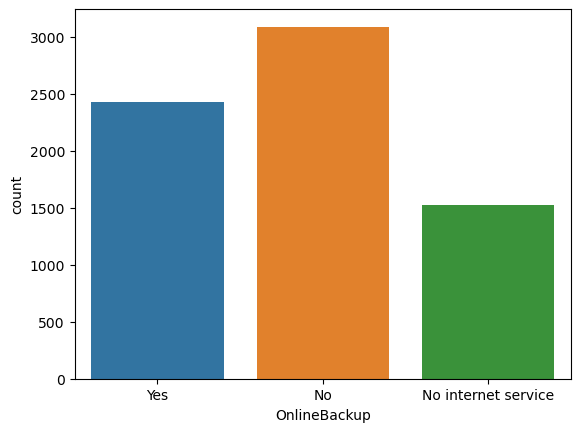

In [49]:
ax = sns.countplot(x='OnlineBackup', data= data)
print(data['OnlineBackup'].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


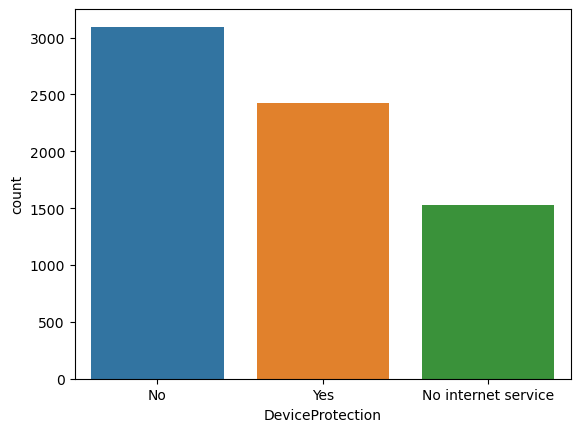

In [50]:
ax = sns.countplot(x='DeviceProtection', data= data)
print(data['DeviceProtection'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


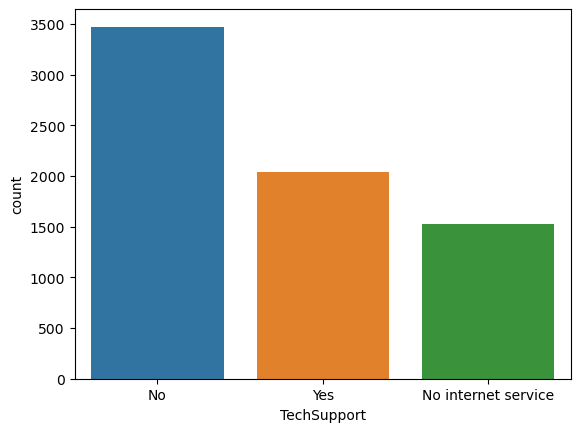

In [51]:
ax = sns.countplot(x='TechSupport', data= data)
print(data['TechSupport'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


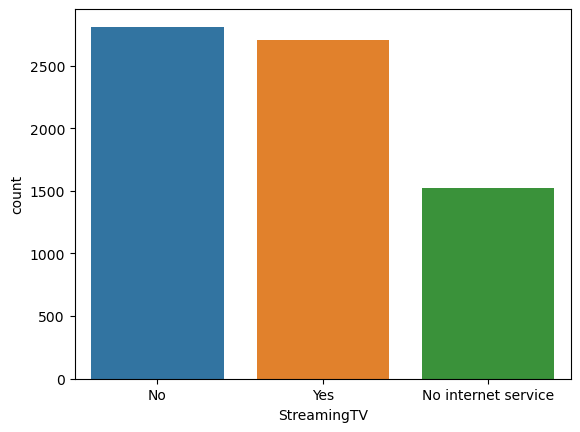

In [52]:
ax = sns.countplot(x='StreamingTV', data= data)
print(data['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


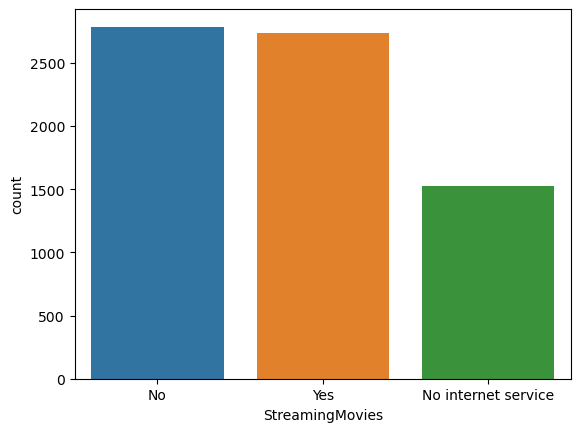

In [53]:
ax = sns.countplot(x='StreamingMovies', data= data)
print(data['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


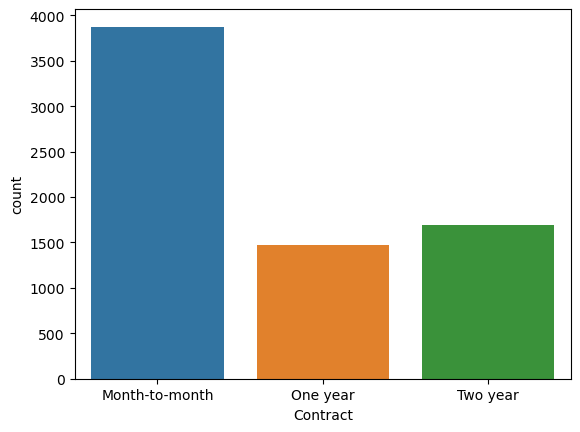

In [54]:
ax = sns.countplot(x='Contract', data= data)
print(data['Contract'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


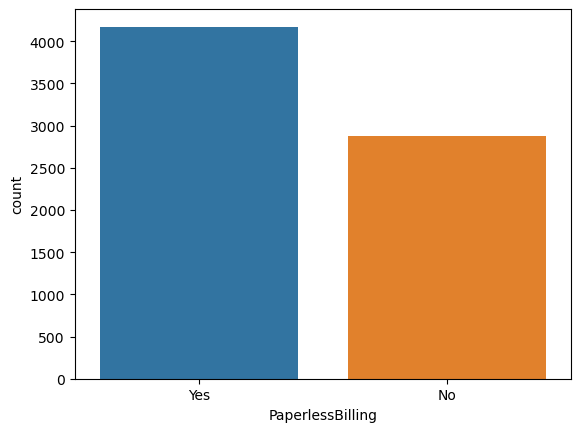

In [55]:
ax = sns.countplot(x='PaperlessBilling', data= data)
print(data['PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


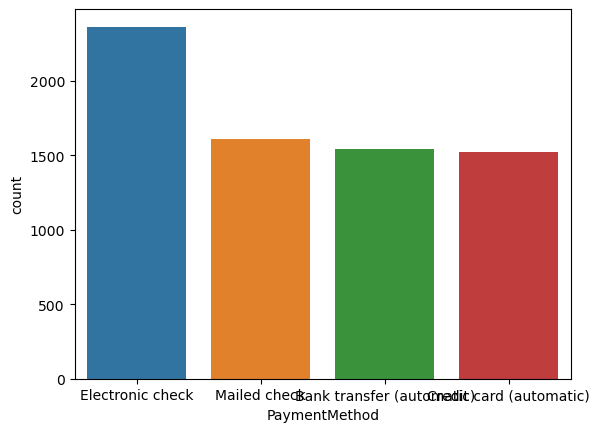

In [56]:
ax = sns.countplot(x='PaymentMethod', data= data)
print(data['PaymentMethod'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


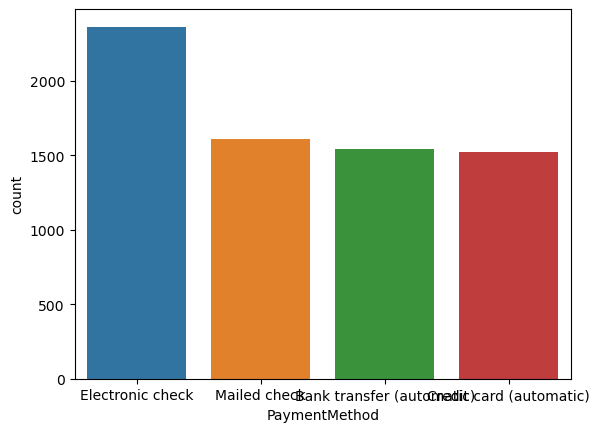

In [57]:
ax = sns.countplot(x=data['PaymentMethod'])
textprops = {"fontsize":5}
print(data['PaymentMethod'].value_counts())

# lets check how the data is distributed in the remaining columns 

In [58]:
import warnings
warnings.filterwarnings('ignore')

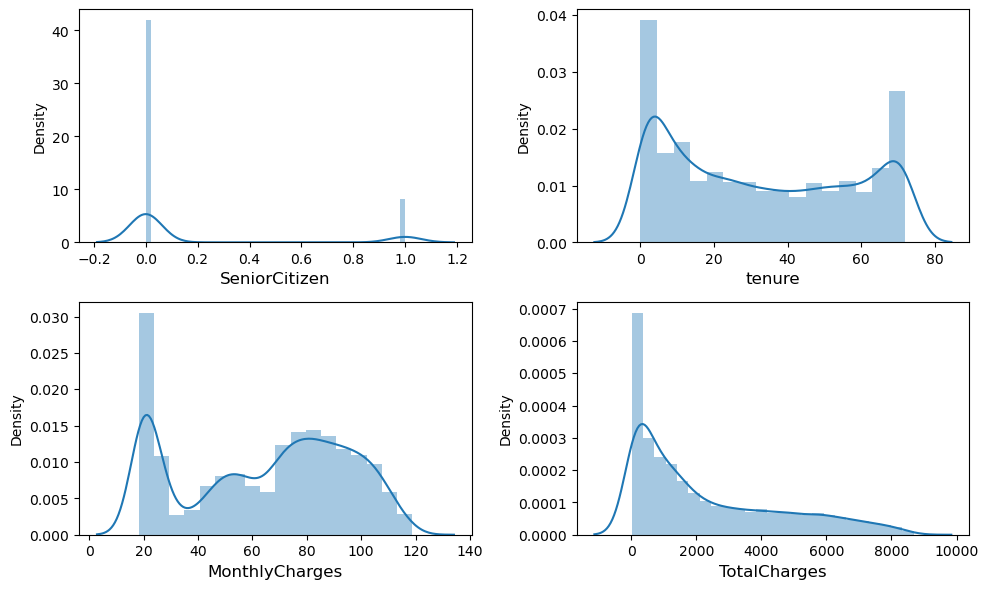

In [59]:
plt.figure(figsize= (10,6), facecolor = 'white')
plotnumber = 1
for col in num_col:
    if plotnumber<=4:
        ax= plt.subplot(2,2, plotnumber)
        sns.distplot([data[col]])
        plt.xlabel(col, fontsize =12)
        plt.yticks(rotation = 0, fontsize = 10)
        
    plotnumber +=1
plt.tight_layout()    

In [60]:
# monthly and tenure not have skewness
# senior citizen and total charges have positive skewed.

# BI-variate Analysis

In [61]:
# when we are doin g thr analyis between the two plots

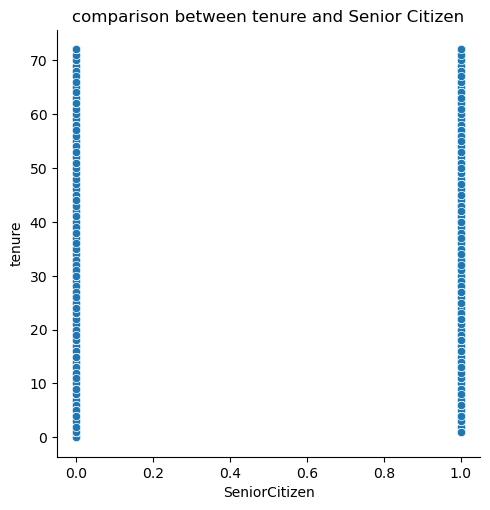

In [62]:
sns.relplot(x="SeniorCitizen", y = "tenure", data= data)
plt.title('comparison between tenure and Senior Citizen')
plt.show()
          

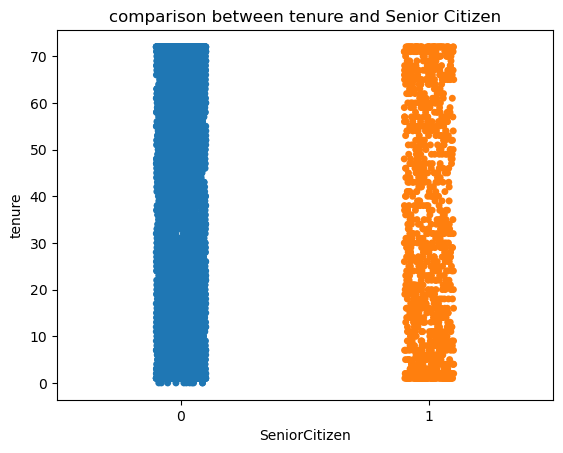

In [63]:
sns.stripplot(x="SeniorCitizen", y = "tenure", data= data)
plt.title('comparison between tenure and Senior Citizen')
plt.show()

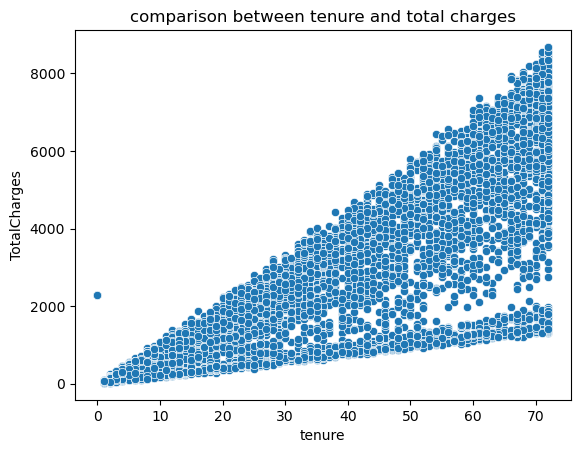

In [64]:
sns.scatterplot(x='tenure', y = "TotalCharges", data=data)
plt.title("comparison between tenure and total charges")
plt.show()

# ir

<AxesSubplot:title={'center':'comparion between churn and gender'}, xlabel='gender', ylabel='SeniorCitizen'>

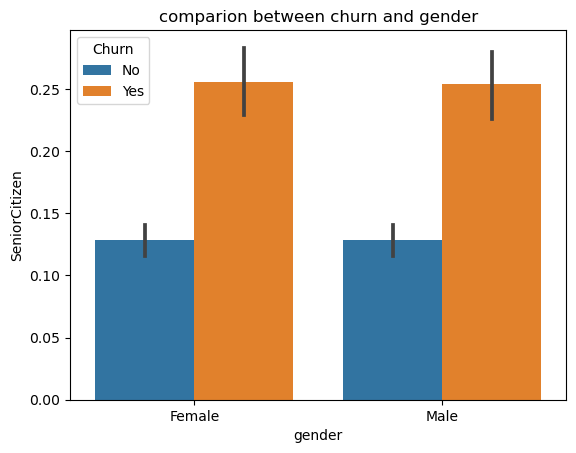

In [65]:
plt.title("comparion between churn and gender")
sns.barplot(x= 'gender', y = 'SeniorCitizen', data= data, hue ='Churn')

<AxesSubplot:title={'center':'comparion between total charges and monthly charges'}, xlabel='MonthlyCharges', ylabel='TotalCharges'>

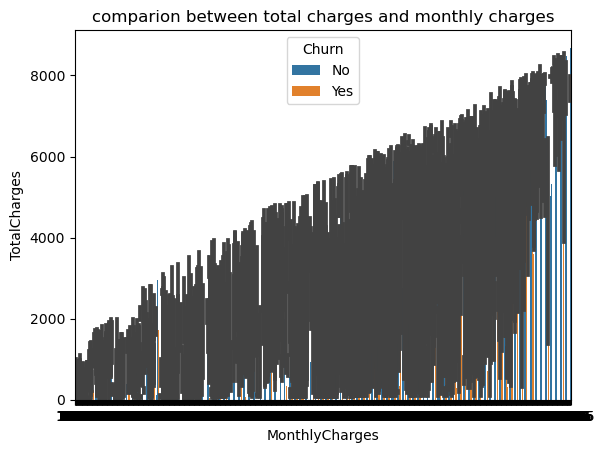

In [66]:
plt.title("comparion between total charges and monthly charges")
sns.barplot(x= 'MonthlyCharges', y = 'TotalCharges', data= data, hue ='Churn')

<AxesSubplot:title={'center':'comparion between total charges and monthly charges'}, xlabel='MonthlyCharges', ylabel='SeniorCitizen'>

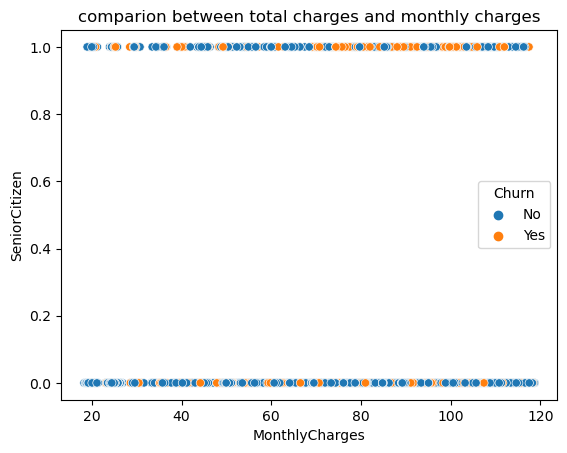

In [67]:
plt.title("comparion between total charges and monthly charges")
sns.scatterplot(x= 'MonthlyCharges', y = 'SeniorCitizen', data= data, hue ='Churn')

# cat plot

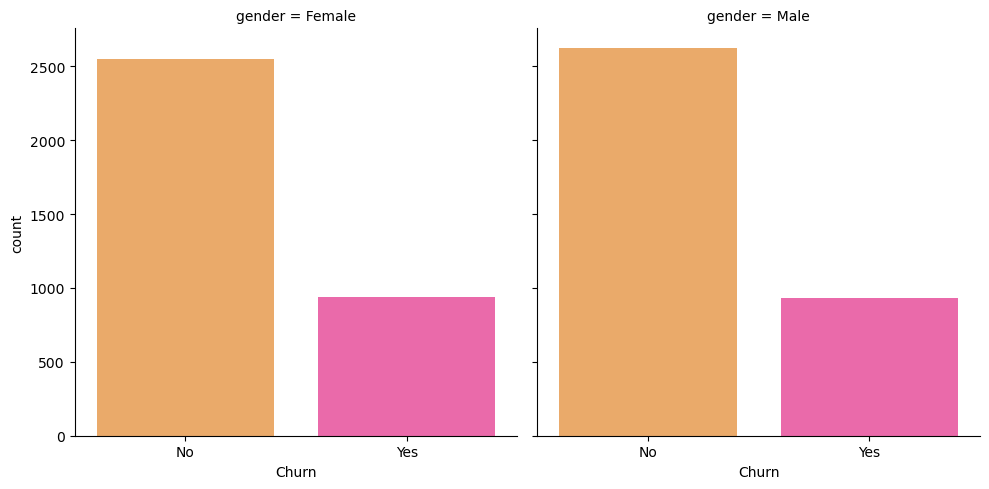

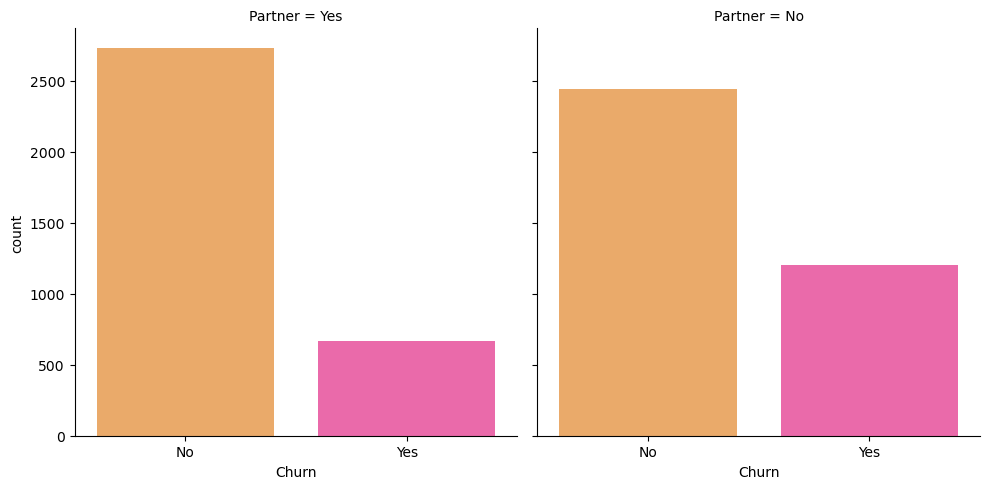

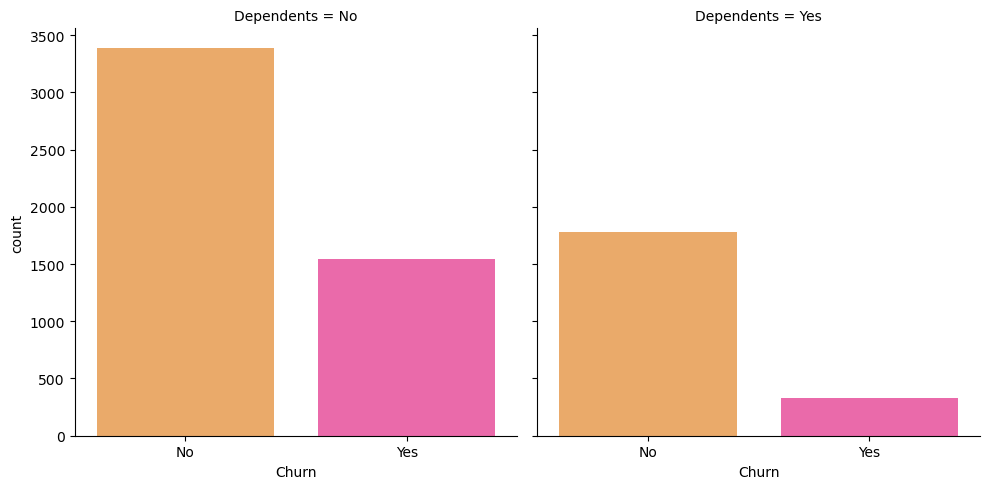

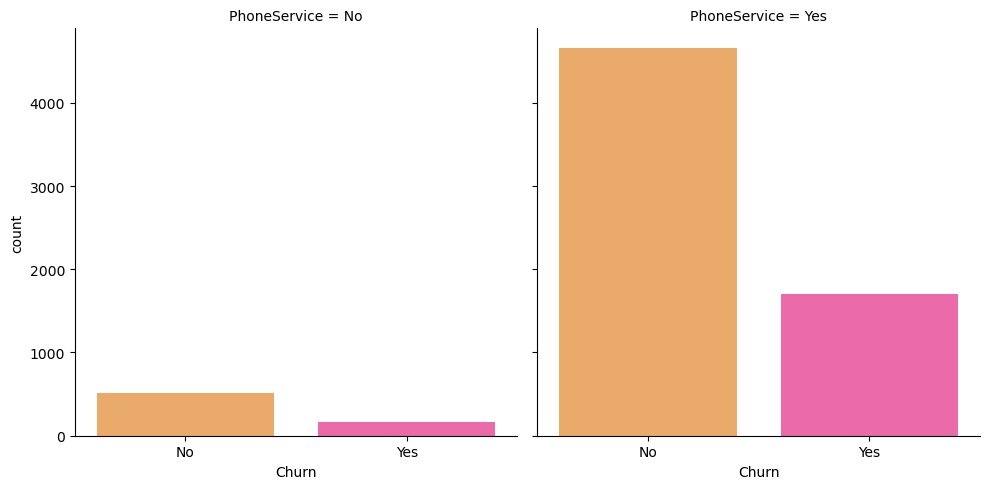

In [68]:
figure =  figsize = (20,25)
sns.catplot(x= 'Churn', col= 'gender',data =data, kind = 'count', palette='spring_r')
sns.catplot(x= 'Churn', col= 'Partner',data =data, kind = 'count', palette='spring_r')
sns.catplot(x= 'Churn', col= 'Dependents',data =data, kind = 'count', palette='spring_r')
sns.catplot(x= 'Churn', col= 'PhoneService',data =data, kind = 'count', palette='spring_r')

In the first graph we clearly see that there is no effect on which customer has different gender.
In the second Garph, the customer have parners have high churn rate as compared to customer with no partner.
In the third garph , the customer have high churn rate who is not dependant as compared to customer who have not dependant.
In the last Graph, the phone service customer has high churn rate.


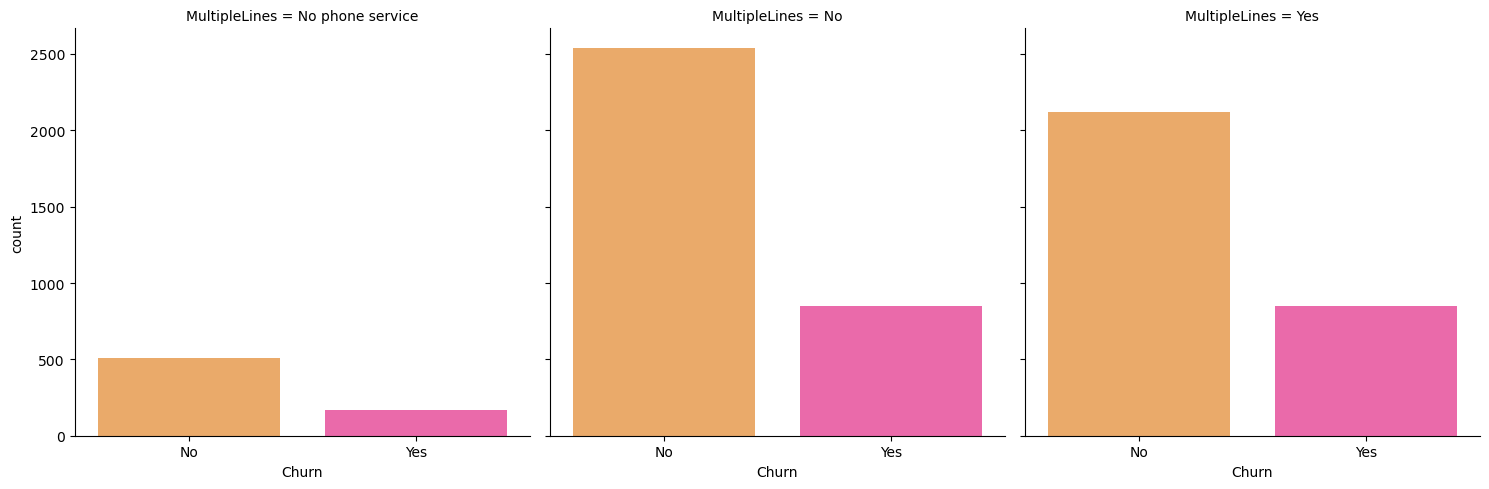

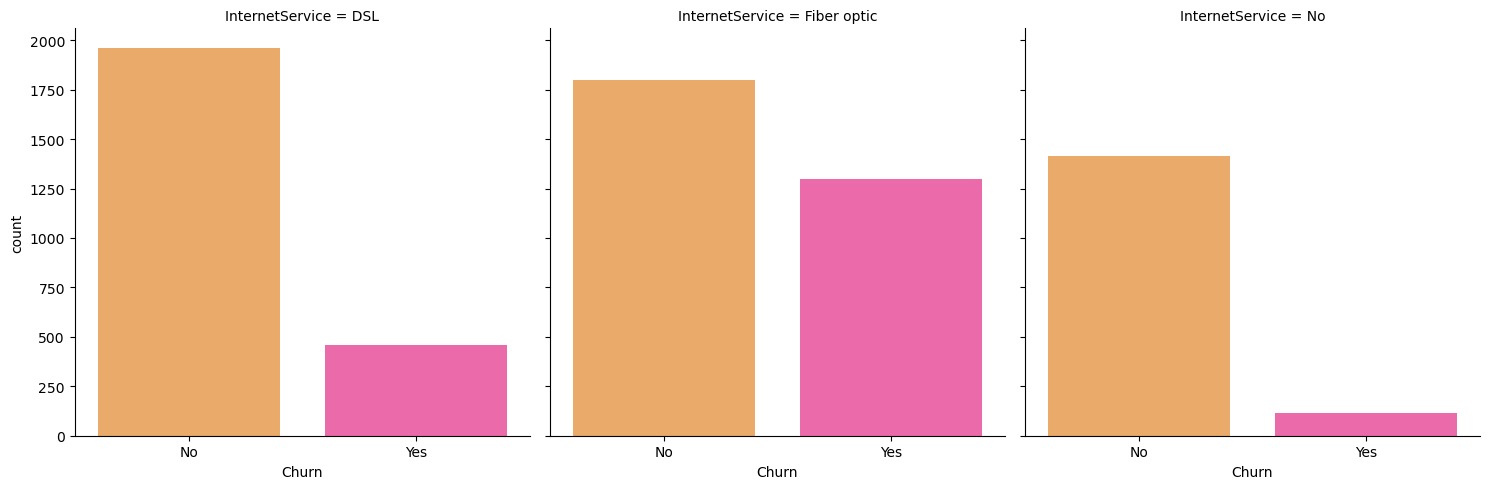

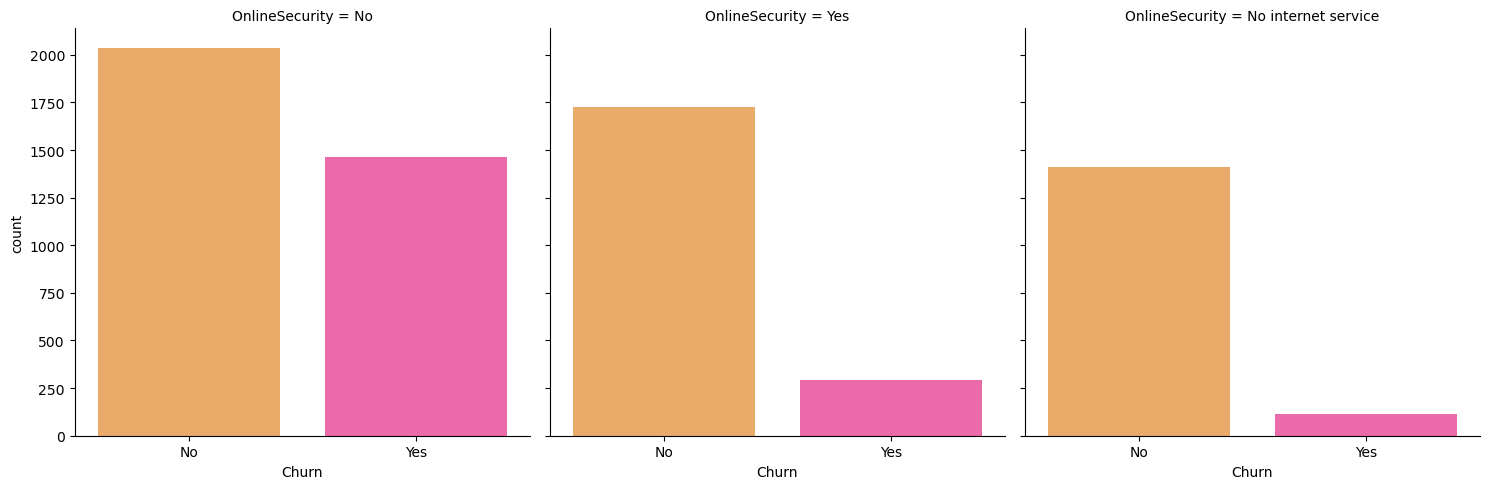

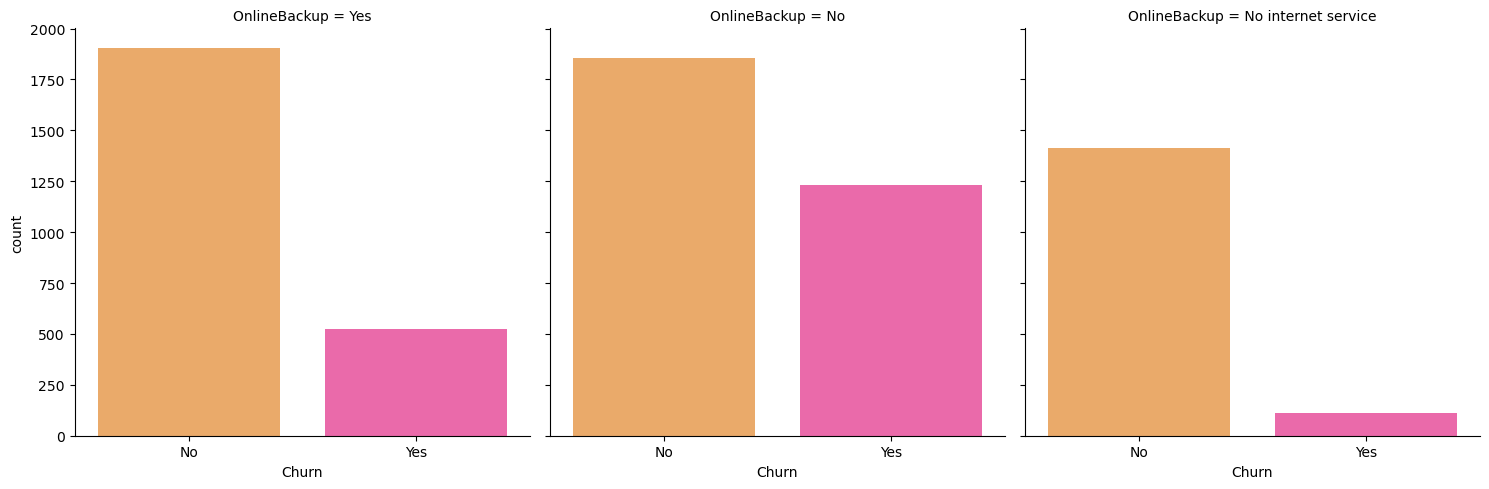

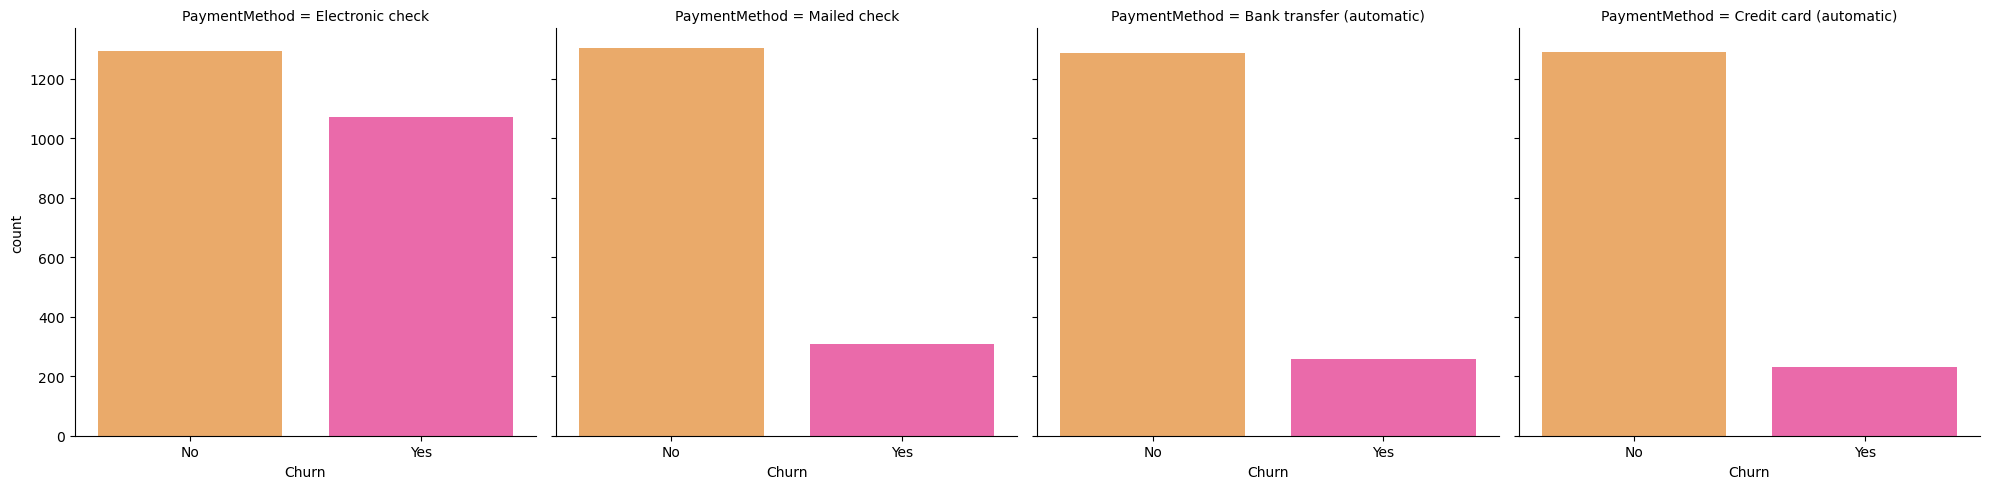

In [69]:
sns.catplot(x= 'Churn', col= 'MultipleLines',data =data, kind = 'count', palette='spring_r')
sns.catplot(x= 'Churn', col= 'InternetService',data =data, kind = 'count', palette='spring_r')
sns.catplot(x= 'Churn', col= 'OnlineSecurity',data =data, kind = 'count', palette='spring_r')
sns.catplot(x= 'Churn', col= 'OnlineBackup',data =data, kind = 'count', palette='spring_r')
sns.catplot(x= 'Churn', col= 'PaymentMethod',data =data, kind = 'count', palette='spring_r')

In first Graph,the customes ha shigh churn rate whic has multipleline service as comapred to who dont have .
In second Graph, fiberoptic customer ha shigh churn rate as comapred to internet service
In thisrd Graph, the custome who have already high seurityhas low churn rate as compared to customer has no online security access.
In forth Graph, the customes has already online backup has high Churn rate.
In the last graph, custome who uses electronic check for transfer has high churn rate.

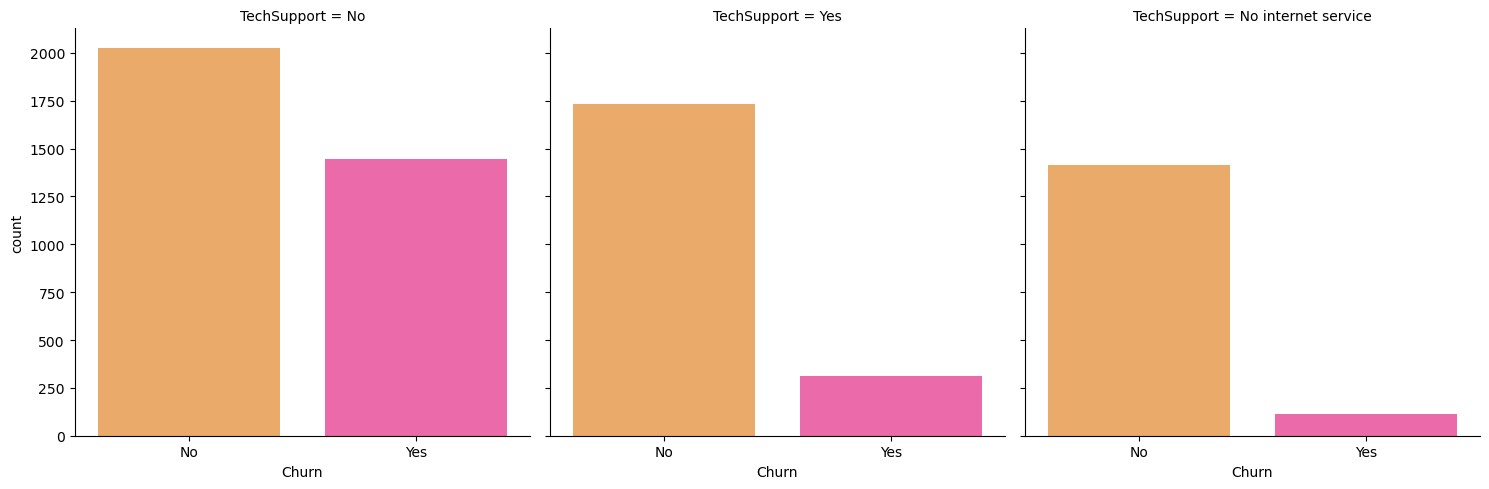

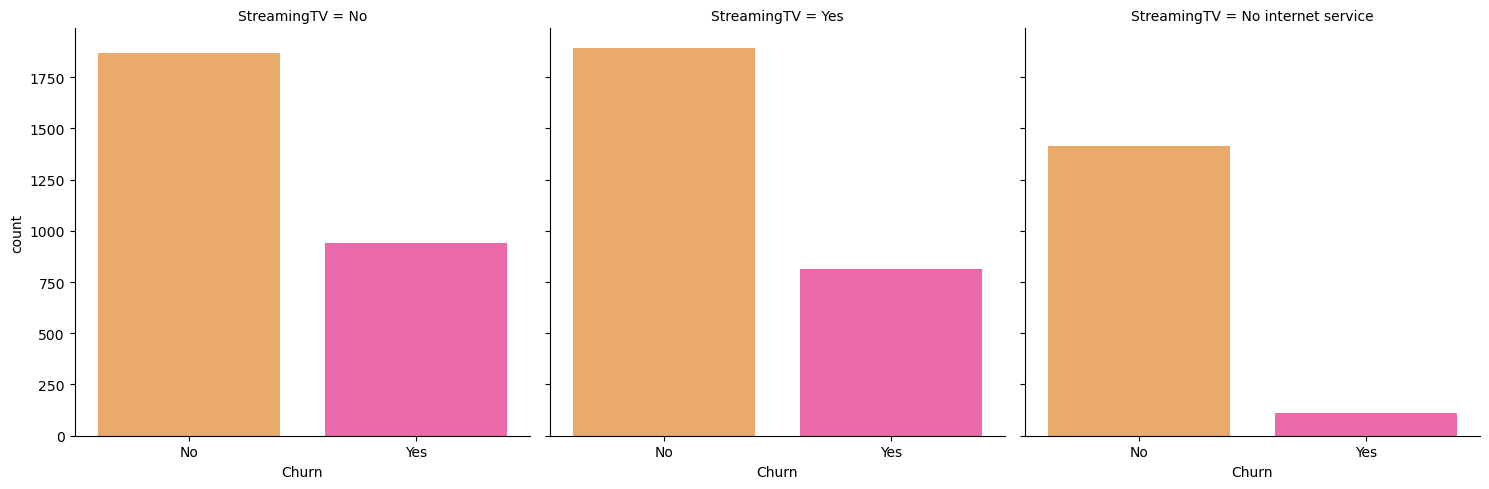

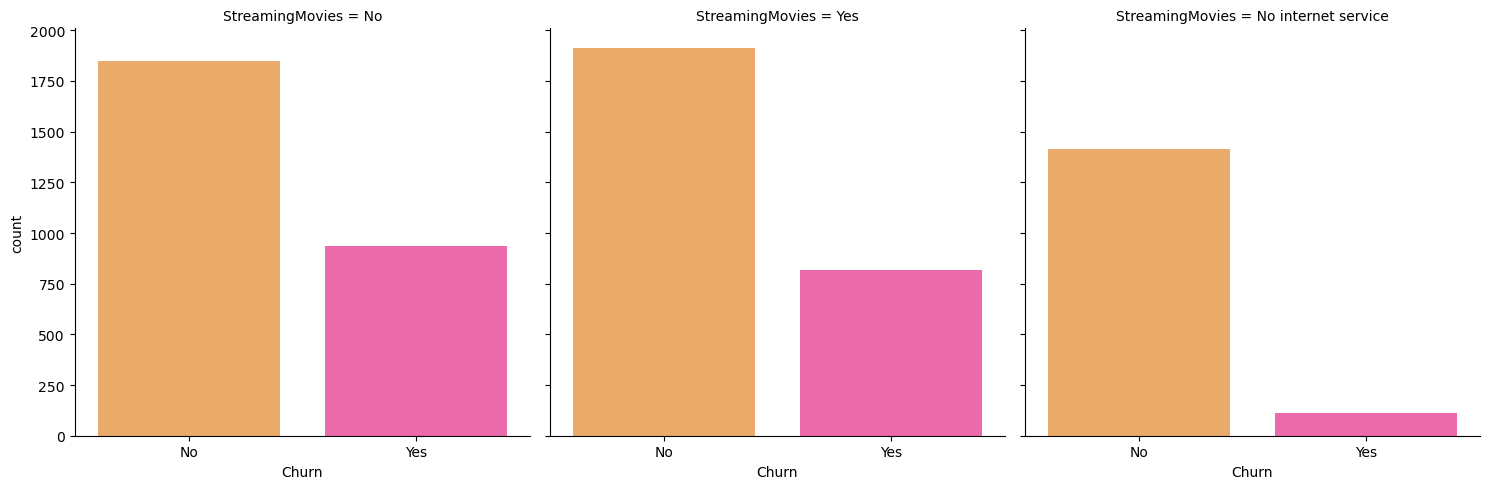

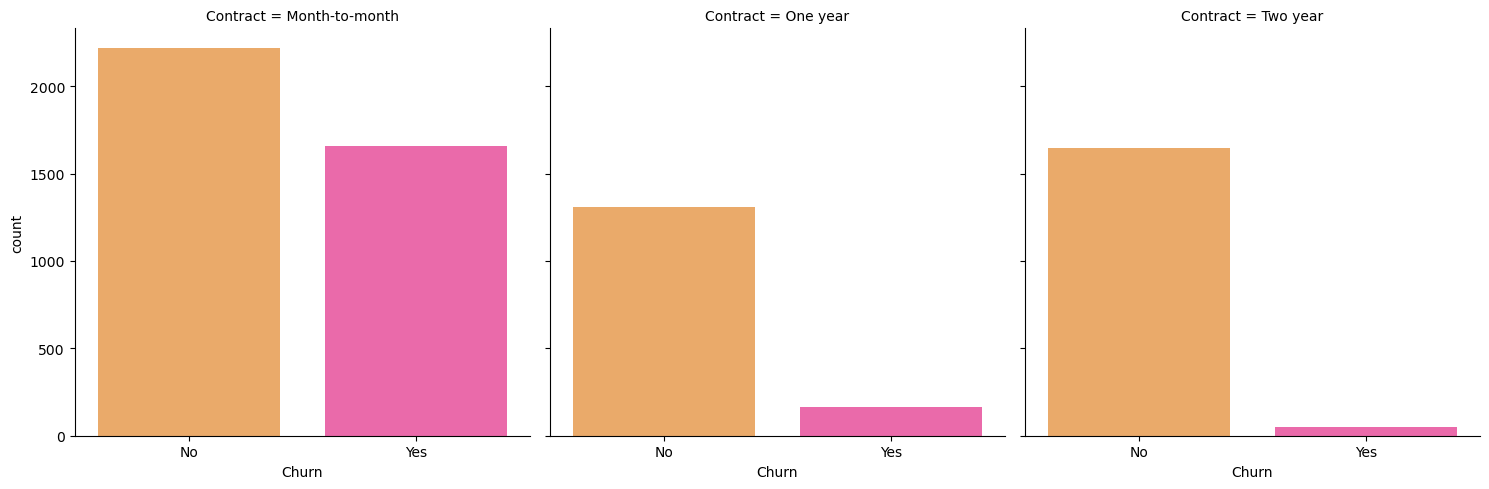

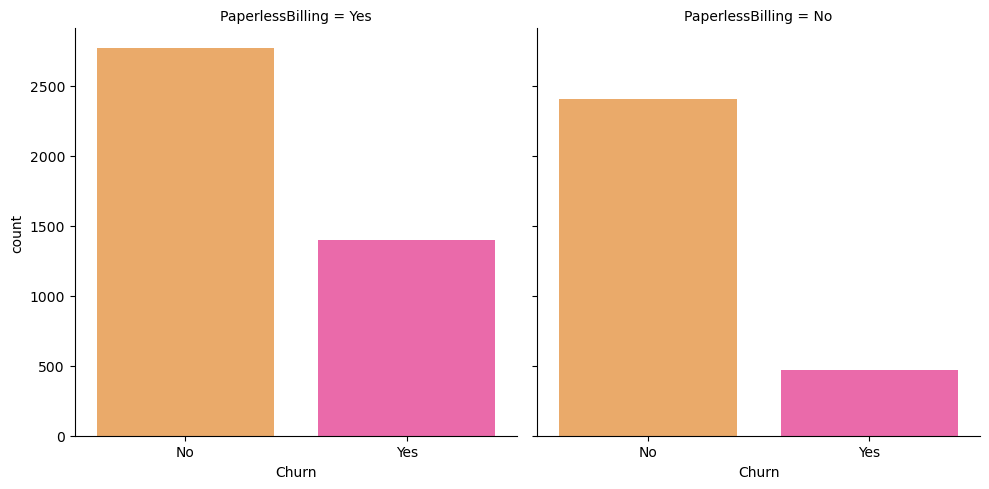

In [70]:
sns.catplot(x= 'Churn', col= 'TechSupport',     data =data, kind = 'count', palette='spring_r')
sns.catplot(x= 'Churn', col= 'StreamingTV',     data =data, kind = 'count', palette='spring_r')
sns.catplot(x= 'Churn', col= 'StreamingMovies',data =data, kind = 'count', palette='spring_r')
sns.catplot(x= 'Churn', col= 'Contract',        data =data, kind = 'count', palette='spring_r')
sns.catplot(x= 'Churn', col= 'PaperlessBilling',data =data, kind = 'count', palette='spring_r')

first garph, customer has no techsupport has high churn rate compared to customer has tech support.
Second graph, no significent changes in the streaming Tv. 
third graph, no significent changes in the streaming Movies.
forth graph,  the customer has monthly contract have high churn rate compared to customer has yeraluy contract.
last graph, customer who paid online billing as high churn rate as compared to customer has no paperlss billing.


#  Multi-Variate Analysis  

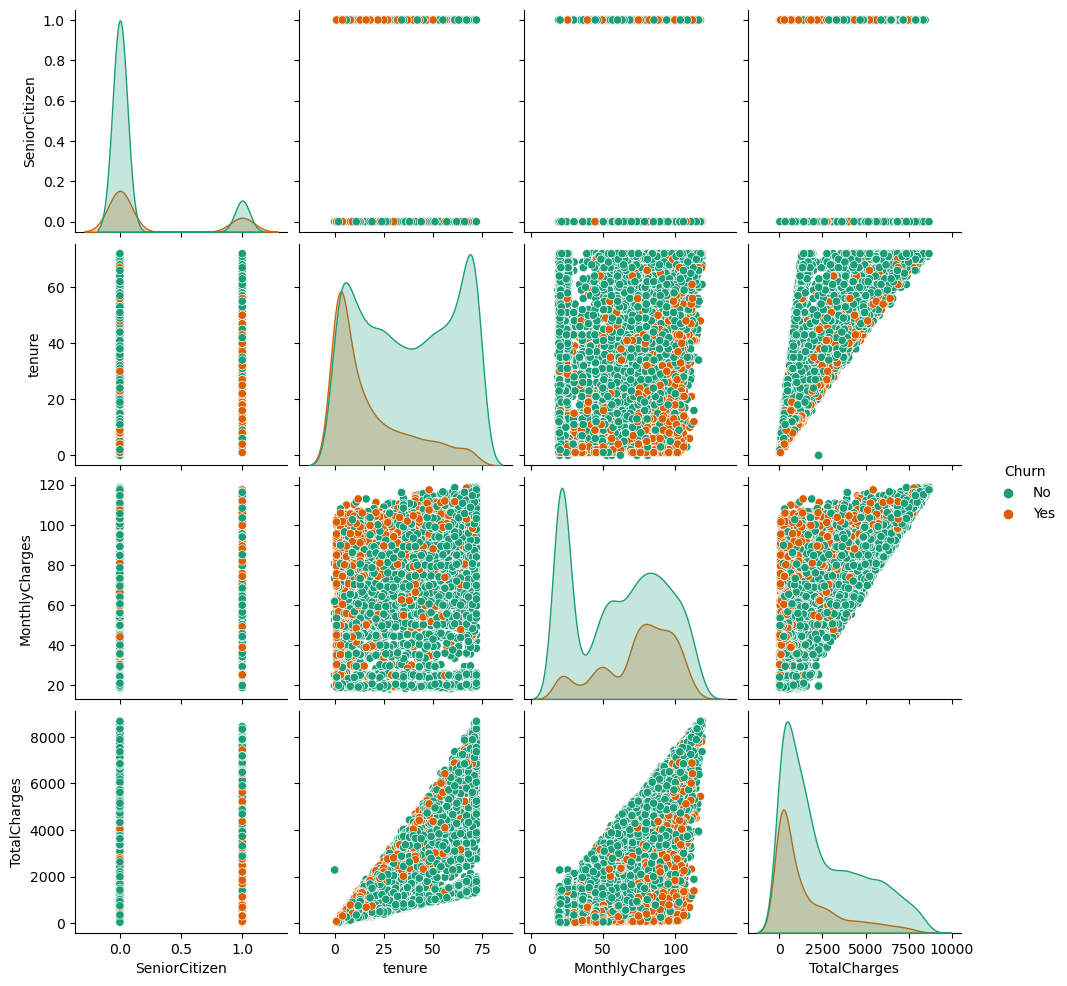

In [71]:
sns.pairplot(data,hue="Churn", palette = "Dark2")
plt.show()

the feature tenure and total charges have good relation with each other.
the feature monthly charges and total charges have good relation with each other.

In [72]:
# checking the outliers

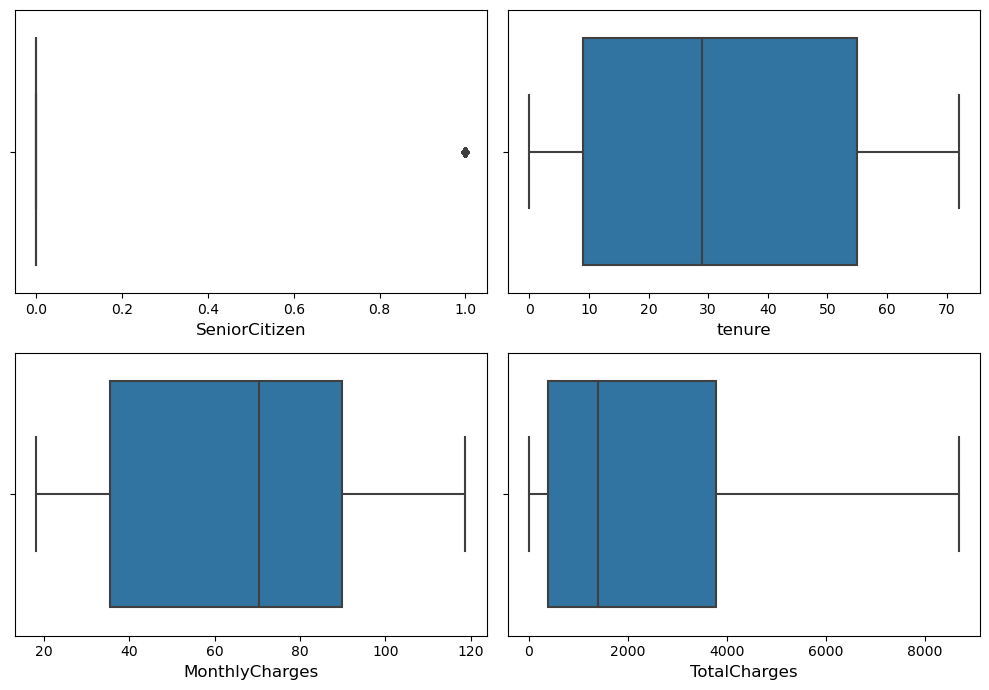

In [73]:
plt.figure(figsize= (10,7), facecolor = 'white')
plotnumber = 1
for col in num_col:
    if plotnumber<=4:
        ax= plt.subplot(2,2, plotnumber)
        sns.boxplot(data[col])
        plt.xlabel(col, fontsize =12)
        plt.yticks(rotation = 0, fontsize = 10)
        
    plotnumber +=1
plt.tight_layout() 

only outlier we observe in seniout citizen..but it is a catgorical data..so we dont need to remove it.

In [74]:
# lets check the skewness here.

In [75]:
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

we can clearly obeserve that monthly charges has negative value but the acceptable range of the skewness is -05 to 0.5.
here only senior citizen and total charges have value beyond the limit, but senior citizen is a categorical data so 
dont need to remove it
nut total charges is contineous data so we must to remove the skewness by using cube root.

In [76]:
data["TotalCharges"] = np.cbrt(data['TotalCharges'])

In [77]:
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

now it is an acceptable range.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

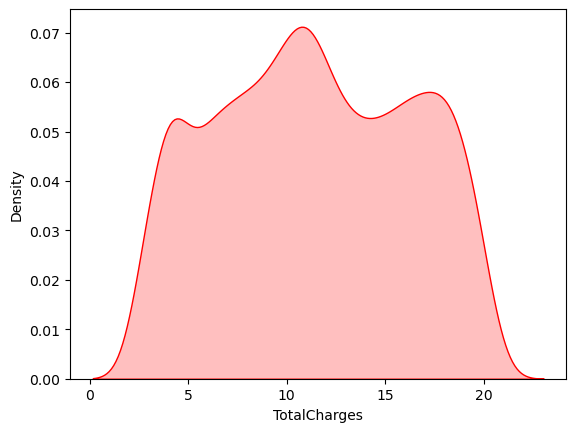

In [78]:
sns.distplot(data["TotalCharges"], color = "r", hist=False, kde_kws ={"shade": True})

# Encoding categorical colouns

In [79]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes =='object':
        data[i]=oe.fit_transform(data[i].values.reshape(-1,1 ))


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In [81]:
# agian we check
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


In [82]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0


In [83]:
cor = data.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


we will not find the exact co relation. so we use heatmap for better understanding.

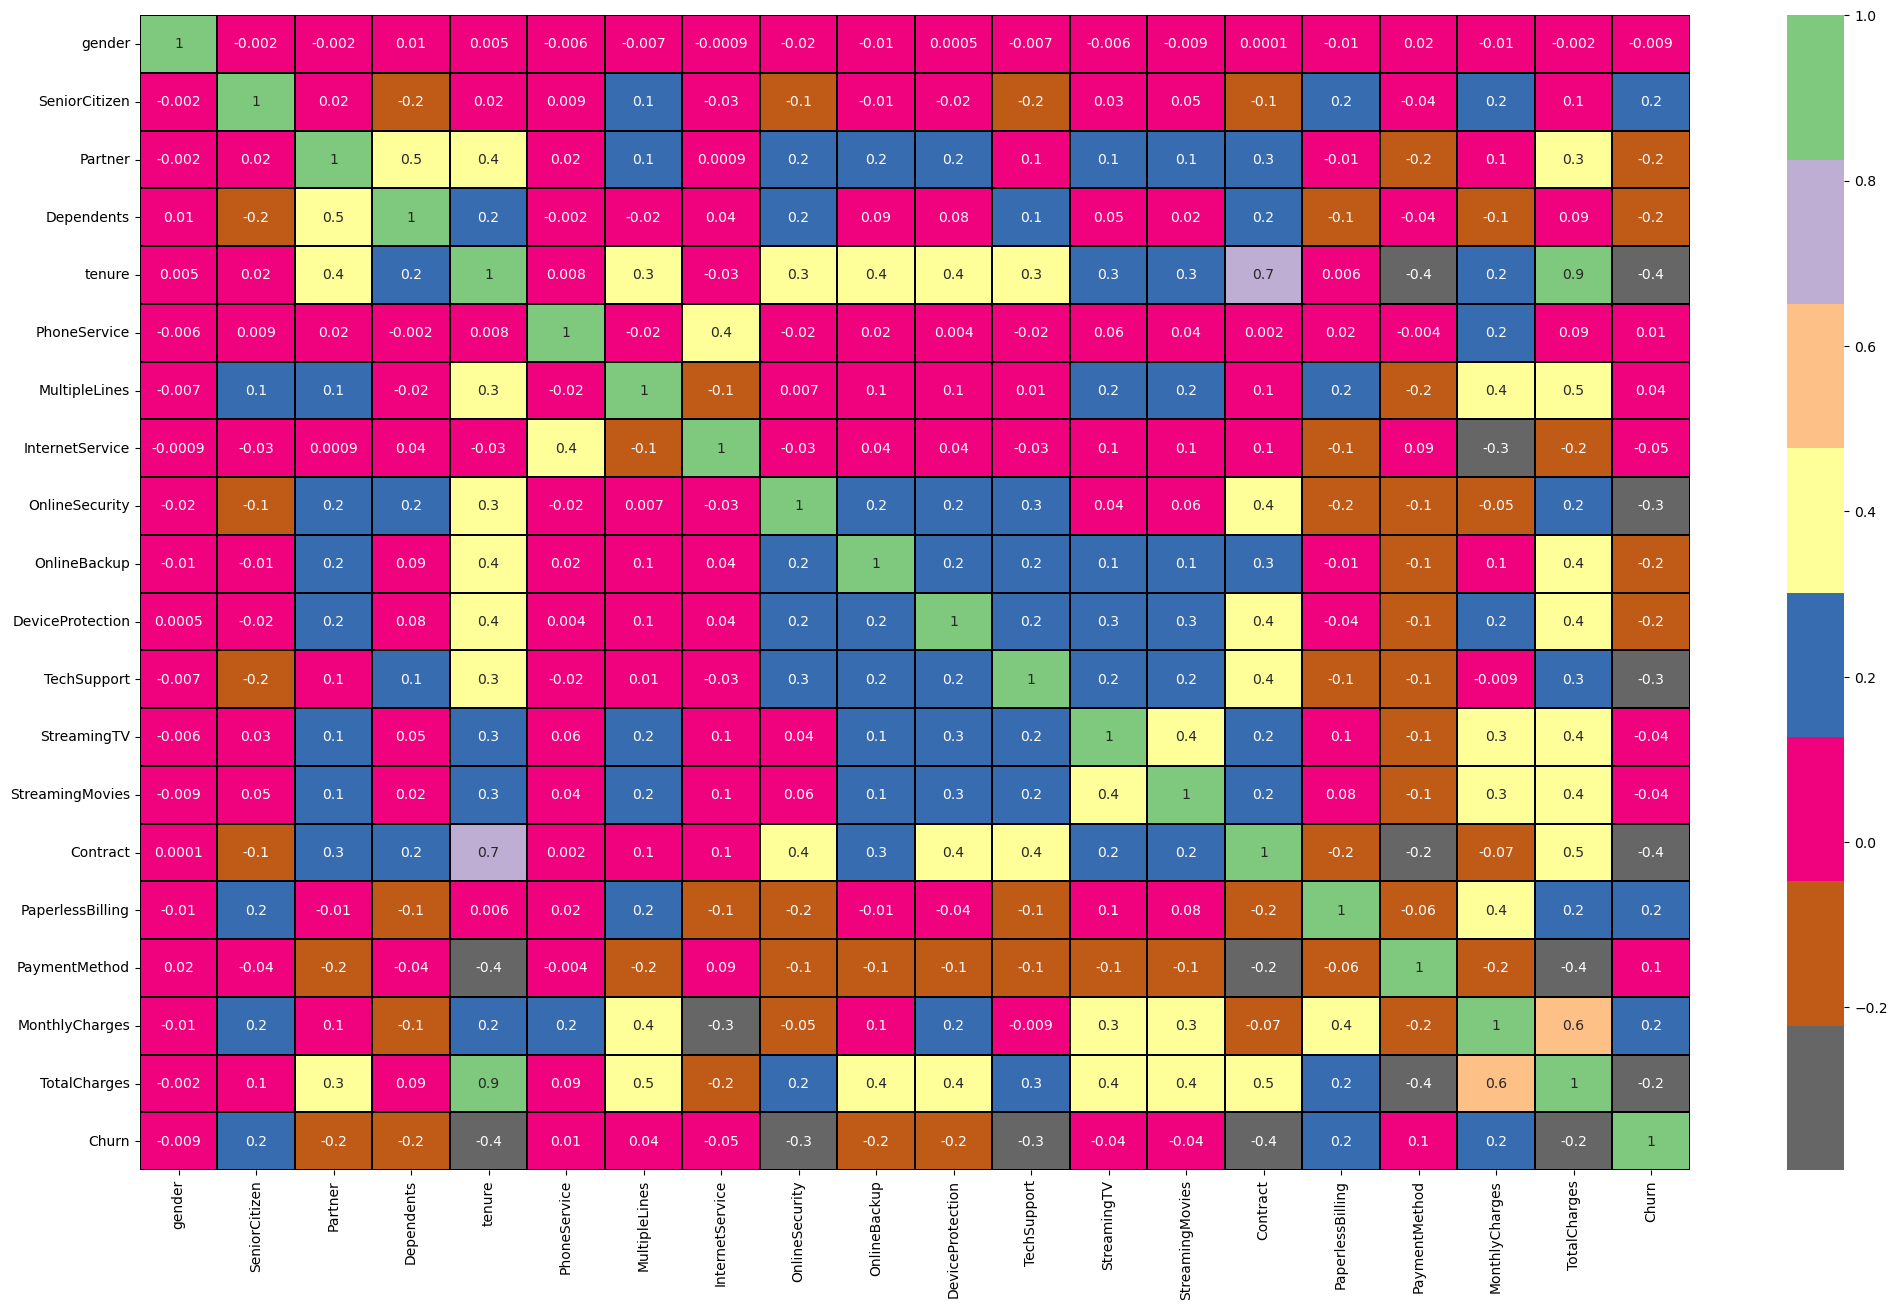

In [84]:
plt.figure(figsize = (25,15))
sns.heatmap(data.corr(), linewidths =0.1,fmt= '0.1g', linecolor = 'black',annot = True, cmap = 'Accent_r')
plt.yticks()
plt.show()

first we know the acceptable range
-1 to 1 -------------> Highely negative corelation
0--------------------> no corelation
-0.3 to 0.3 ---------> less corelation
-0.5 to 0.5-----------> moderat
-0.7 to 0.7-----------> very high colrlation

tenure and monthly charges have highely corelated



In [85]:
cor['Churn'].sort_values(ascending =  False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

In [86]:
# viusalizing the corelation between label and feature using bar plot

Text(0.5, 1.0, 'corelation between label and feature using bar plot')

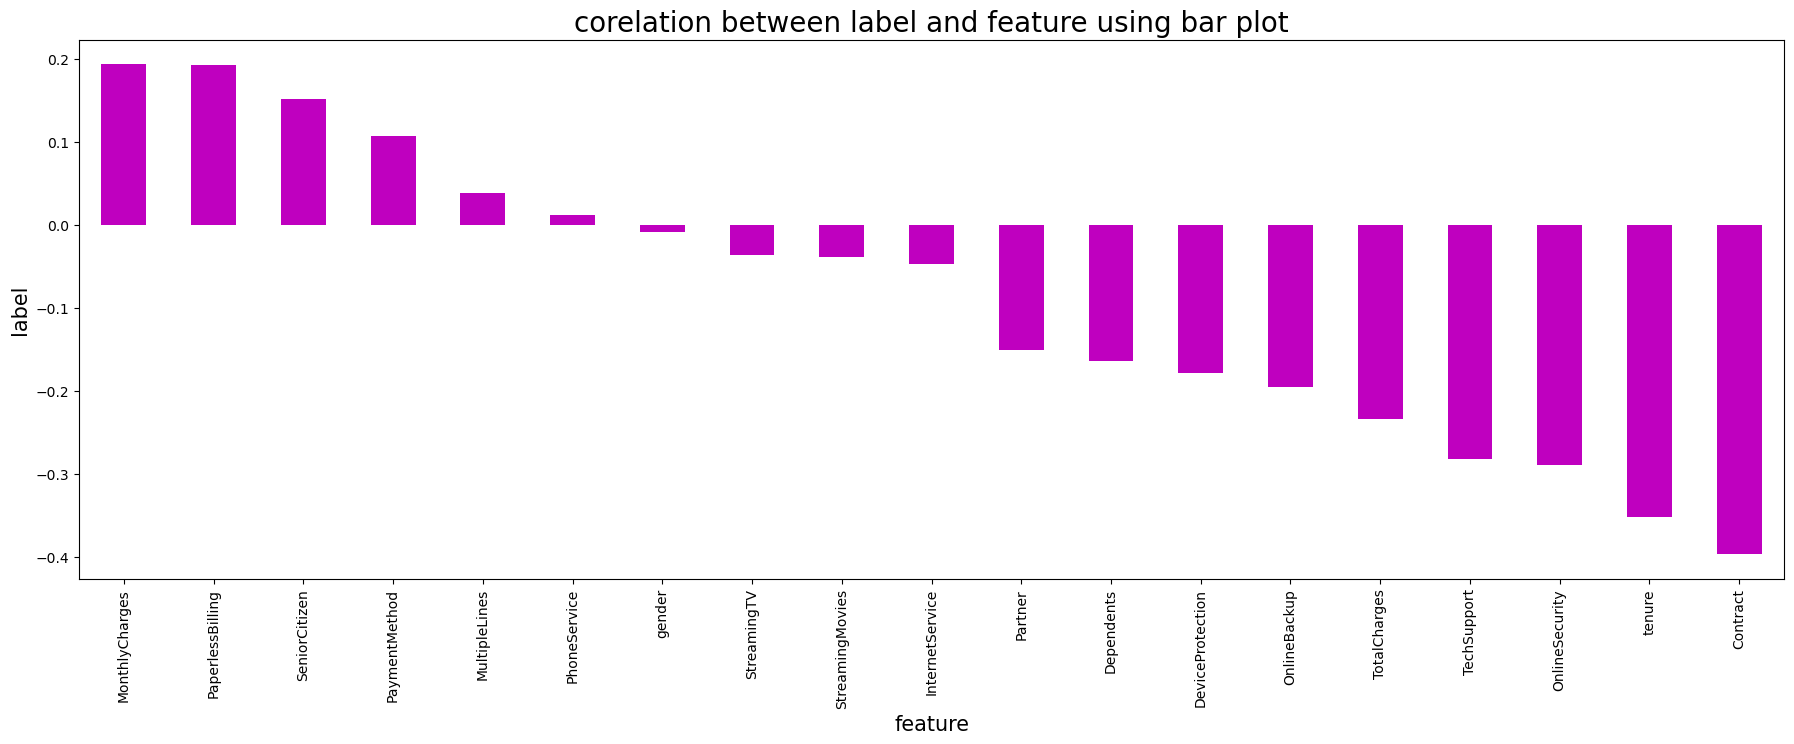

In [87]:
plt.figure(figsize=(22,7))
data.corr()["Churn"].sort_values(ascending = False).drop(["Churn"]).plot(kind = 'bar',color = "m")
plt.xlabel('feature', fontsize = 15)
plt.ylabel('label',fontsize = 15)
plt.title('corelation between label and feature using bar plot', fontsize = 20)

here we can notice that the positive and negative corelation with the feature and the label.
Gender, phone service has less realtion wrt to churn rate.

# now we are doing scaling
1>min maxscaler  2> standrad scaler

# for doing biasness we are doing scaling method

In [88]:
# seperating deature and label
x = data.drop("Churn", axis =1)
y = data["Churn"]

In [89]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =  pd.DataFrame()
vif["vif values"] = [variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif["Features"] = x.columns

In [91]:
vif

,vif values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


if value 1 -> it s not correalted with the remaining coloumn
if value 12--> it is 12 times corelate deiith remiaing features when there was no coliinerarity
here vif threshold value is  5 but sometimes it is considered as 10
lets remove the feature which have high threshold value

In [92]:
x.drop('TotalCharges', axis =1, inplace =  True)

In [93]:
# again check vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =  pd.DataFrame()
vif["vif values"] = [variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif["Features"] = x.columns

In [94]:
vif

,vif values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


now we are solve the multi collinearity isse now we can buld the model

In [95]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

now this is the case of the oversampling. This is called as a inbalance data

In [96]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [97]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y =  sm.fit_resample(x,y)

In [98]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 0        0.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
10343    1.0
10344    1.0
10345    1.0
10346    1.0
10347    1.0
Name: Churn, Length: 10348, dtype: float64>

In [99]:
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

now data is totally balanced. Now we can build machine learning classification models.
for that lets finding the best random state.

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [101]:
MaxAccu = 0
maxRS = 0
for i in range(1,400):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = i)
    
RFR = RandomForestClassifier()
RFR.fit(x_train,y_train)
pred = RFR.predict(x_test)
acc = accuracy_score(y_test,pred)

if acc>MaxAccu:
    MaxAccu = acc
    maxRS = i
    
print("Best accuracy is", MaxAccu, "at random state", maxRS)    

Best accuracy is 0.8557165861513688 at random state 399


In [102]:
# creating train test split

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = maxRS)

In [104]:
# checking accuracy for RandomForestClassifier

In [105]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [106]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)

print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

0.8537842190016103
[[1367  212]
 [ 242 1284]]
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1579
         1.0       0.86      0.84      0.85      1526

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



here we clearly observe taht theaccuracy of forest random classifier is 85% 

In [107]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)

print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

0.7742351046698873
[[1174  405]
 [ 296 1230]]
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77      1579
         1.0       0.75      0.81      0.78      1526

    accuracy                           0.77      3105
   macro avg       0.78      0.77      0.77      3105
weighted avg       0.78      0.77      0.77      3105



here we clearly observe that the accuracy of Logistic Regression is 77%

In [108]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [109]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8138486312399356
[[1237  342]
 [ 236 1290]]
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      1579
         1.0       0.79      0.85      0.82      1526

    accuracy                           0.81      3105
   macro avg       0.82      0.81      0.81      3105
weighted avg       0.82      0.81      0.81      3105



the accuracy of SVC is about 80 %

In [110]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc = abc.predict(x_test)

print(accuracy_score(y_test, predabc))
print(confusion_matrix(y_test, predabc))
print(classification_report(y_test, predabc))

0.8186795491143317
[[1255  324]
 [ 239 1287]]
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.82      1579
         1.0       0.80      0.84      0.82      1526

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



the accuracy of Ada boost classifier is 81% 

In [111]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(x_train,y_train)
predbc = bc.predict(x_test)

print(accuracy_score(y_test, predbc))
print(confusion_matrix(y_test, predbc))
print(classification_report(y_test, predbc))

0.828341384863124
[[1341  238]
 [ 295 1231]]
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83      1579
         1.0       0.84      0.81      0.82      1526

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



the accuracy of Bagging classifier is 82%

In [112]:
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
predet = et.predict(x_test)

print(accuracy_score(y_test, predet))
print(confusion_matrix(y_test, predet))
print(classification_report(y_test, predet))

0.8685990338164251
[[1378  201]
 [ 207 1319]]
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1579
         1.0       0.87      0.86      0.87      1526

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



the accuracy of Bagging classifier is 86%
but we dont know this accuracy is perfect.
may be it is overffiting or underfitting model
lets check

# class validation score

In [113]:
from sklearn.model_selection import cross_val_score

checking cross valdaition for random forest classifier

In [114]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print("difference between accuracy score and cross validation score is---", accuracy_score(y_test, predrfc)-score.mean())

[0.77198068 0.79275362 0.89082126 0.90188497 0.90526825]
0.8525417539337308
difference between accuracy score and cross validation score is--- 0.0012424650678795057


In [115]:
score = cross_val_score(lr,x,y)
print(score)
print(score.mean())
print("difference between accuracy score and cross validation score is---", accuracy_score(y_test, predlr)-score.mean())

[0.77101449 0.75120773 0.76956522 0.79168681 0.79700338]
0.776095525622077
difference between accuracy score and cross validation score is--- -0.0018604209521896342


In [116]:
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("difference between accuracy score and cross validation score is---", accuracy_score(y_test, predsvc)-score.mean())

[0.7763285  0.77391304 0.81932367 0.83131948 0.83905268]
0.8079874755710593
difference between accuracy score and cross validation score is--- 0.005861155668876239


In [117]:
score = cross_val_score(abc,x,y)
print(score)
print(score.mean())
print("difference between accuracy score and cross validation score is---", accuracy_score(y_test, predabc)-score.mean())

[0.76956522 0.7705314  0.83285024 0.84533591 0.85403577]
0.8144637074084192
difference between accuracy score and cross validation score is--- 0.004215841705912493


In [118]:
score = cross_val_score(bc,x,y)
print(score)
print(score.mean())
print("difference between accuracy score and cross validation score is---", accuracy_score(y_test, predbc)-score.mean())

[0.73864734 0.75120773 0.86666667 0.88061866 0.89511841]
0.82645176203585
difference between accuracy score and cross validation score is--- 0.0018896228272740068


In [119]:
score = cross_val_score(et,x,y)
print(score)
print(score.mean())
print("difference between accuracy score and cross validation score is---", accuracy_score(y_test, predet)-score.mean())

[0.80724638 0.81062802 0.89661836 0.90478492 0.91058482]
0.8659724994921583
difference between accuracy score and cross validation score is--- 0.0026265343242668493


1) RFC ----> 85 % accuracy
2) LR  ----> 77 % accuracy
3) SVC ----> 80 % accuracy
4) ABC ----> 81 % accuracy
5) BC  ----> 82 % accuracy
6) ETC ----> 86 % accuracy

 Extra trees classifier is our best model

# Extra trees classifier is our best model

Hyper tunning parameter

In [120]:
parameters = {'criterion': ['gini','entropy'], 
              'random_state': [10,50,1000], 
              'max_depth':[0,10,20],
              'n_jobs':[-2,-1,1], 
              'n_estimators': [50,100,200,300]}


In [121]:
from sklearn.ensemble import ExtraTreesClassifier

In [122]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [128]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [129]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 1000}

In [133]:
final_model = ExtraTreesClassifier(criterion = 'entropy',
 max_depth = 20,
 n_estimators = 300,
 n_jobs = -2,
 random_state = 1000)

final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

87.31078904991948


Accuracy after hyper tunning is 87.3%

In [137]:
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss

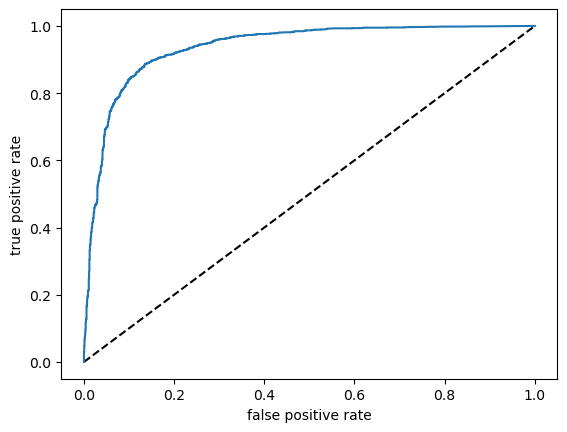

Auc score:   
 0.8734228409074875


In [146]:
y_pred_prob = final_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label = 'RandomForestClassifier(area = %0.2f)'% roc_auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

auc_score = roc_auc_score(y_test, final_model.predict(x_test))
print('Auc score: ', '','\n', auc_score)

This is one  of the performance parameter.
IT IS USE roc FOR BINARY classification problem. so you cannot use for multiclass classifiaction.
it creates probablity curve tPR against the fpr as va threshold. it seperate the signal eom the noise.
AUC that use to masure the ability of your binary classifier to distingwish between the classes.
also give summary of a roc curve
[:, 1] there are two classes so we are selecting one of them.

false postive rate-> Basically FPR tells us what proportion of negative class got in  correctly classified by the classifier.

True positive rate ---> Reacall/ sensitivity

so higher the auc score / value better the performance of model
and our modeling is your classifier is able to distingwwish between positive ad negative classes.
range is 0 to 1
it it is 1 -> classifier is correctely distingwish between the classes.
if it is 0 --> classifier is not perfectly classify between the classes.
0.5---------> not bale to distinwish between thr two classes.

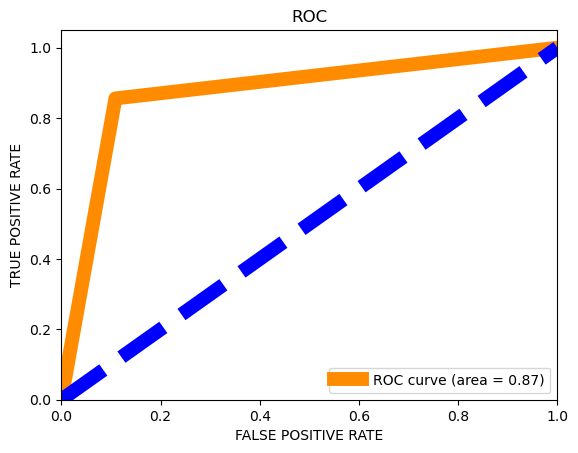

In [153]:
fpr,tpr,threshold = roc_curve(pred, y_test)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color = 'darkorange', lw = 10, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color = 'blue', lw = 10, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC")
plt.legend(loc = "lower right")
plt.show()

#  saving the model

saving the model using .pkl
and also predicting the saved model

In [154]:
import joblib
joblib.dump(final_model, "Telecom_Customer_Churn_Analysis1.pkl")

['Telecom_Customer_Churn_Analysis1.pkl']

In [155]:
model = joblib.load("Telecom_Customer_Churn_Analysis1.pkl")
prediction = model.predict(x_test)
prediction

array([1., 0., 1., ..., 0., 1., 0.])

These are the predicted churn values of the customers.It is always stored in an array format not in DataFrame 
so, you can convert it into DataFrame.

In [1]:
a= np.array(y_test)
data = pd.DataFrame()
data["predicted"] = prediction
data["original"]  = a
data

NameError: name 'np' is not defined

creating dataframe

In [158]:
conclusion = pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ["predicted", "original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104
predicted,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
original,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
